<a href="https://colab.research.google.com/github/umar-ali-k/RNNs/blob/master/RNNs_on_Sarcasm_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary packages

In [0]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Install tensorflow 2.0 

In [0]:
!pip install tensorflow==2.0.0-beta0

# Get the Sarcasm Dataset

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

## Set the hyper-parametres

In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

## Extract training sentences and labels

In [0]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


# Tokenize and pad the sequences

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## Sequential Model having a Conv 1D layer

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

### Print the summary of the model

In [40]:
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 24)                3096      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Set the number of epochs and fit the model

In [43]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Train on 20000 samples, validate on 6709 samples
Epoch 1/10
20000/20000 [==============================] - 9s 447us/sample - loss: 0.4698 - accuracy: 0.7633 - val_loss: 0.4087 - val_accuracy: 0.8132
Epoch 2/10
20000/20000 [==============================] - 9s 436us/sample - loss: 0.3637 - accuracy: 0.8346 - val_loss: 0.3932 - val_accuracy: 0.8190
Epoch 3/10
20000/20000 [==============================] - 9s 433us/sample - loss: 0.3261 - accuracy: 0.8582 - val_loss: 0.3918 - val_accuracy: 0.8201
Epoch 4/10
20000/20000 [==============================] - 9s 432us/sample - loss: 0.2936 - accuracy: 0.8734 - val_loss: 0.4006 - val_accuracy: 0.8220
Epoch 5/10
20000/20000 [==============================] - 9s 433us/sample - loss: 0.2622 - accuracy: 0.8869 - val_loss: 0.4309 - val_accuracy: 0.8144
Epoch 6/10
20000/20000 [==============================] - 9s 447us/sample - loss: 0.2297 - accuracy: 0.9053 - val_loss: 0.4412 - val_accuracy: 0.8125
Epoch 7/10
20000/20000 [===========================

## Write plot_graphs function to plot the accuracy and loss

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

## Accuracy

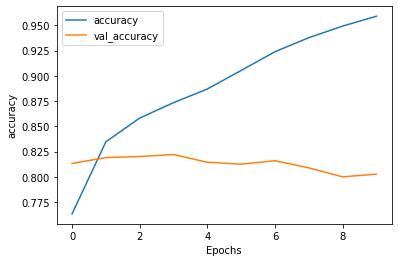

In [45]:
plot_graphs(history, 'accuracy')


## Loss

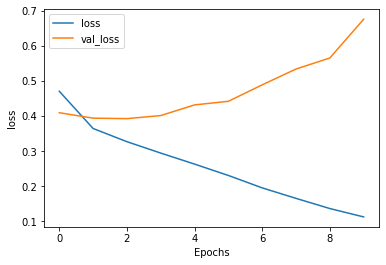

In [46]:
plot_graphs(history, 'loss')

### Model Definition with LSTM

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 120, 16)           16000     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_20 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 25        
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


## Set the number of epochs and fit the model

In [48]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Train on 20000 samples, validate on 6709 samples
Epoch 1/10
20000/20000 [==============================] - 61s 3ms/sample - loss: 0.4538 - accuracy: 0.7695 - val_loss: 0.3874 - val_accuracy: 0.8204
Epoch 2/10
20000/20000 [==============================] - 60s 3ms/sample - loss: 0.3583 - accuracy: 0.8342 - val_loss: 0.3965 - val_accuracy: 0.8143
Epoch 3/10
20000/20000 [==============================] - 61s 3ms/sample - loss: 0.3360 - accuracy: 0.8457 - val_loss: 0.3729 - val_accuracy: 0.8298
Epoch 4/10
20000/20000 [==============================] - 60s 3ms/sample - loss: 0.3176 - accuracy: 0.8575 - val_loss: 0.3830 - val_accuracy: 0.8231
Epoch 5/10
20000/20000 [==============================] - 60s 3ms/sample - loss: 0.3072 - accuracy: 0.8632 - val_loss: 0.3829 - val_accuracy: 0.8286
Epoch 6/10
20000/20000 [==============================] - 60s 3ms/sample - loss: 0.2978 - accuracy: 0.8674 - val_loss: 0.3757 - val_accuracy: 0.8298
Epoch 7/10
20000/20000 [==============================] -

## Write plot_graphs function 

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


## Accuracy

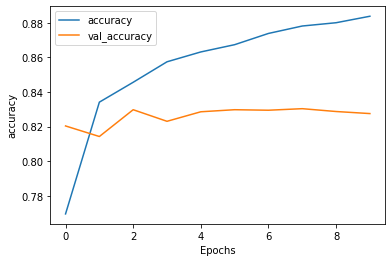

In [52]:
plot_graphs(history, 'accuracy')

## Loss

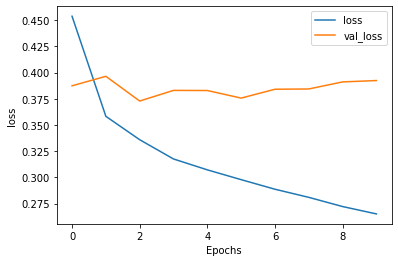

In [53]:
plot_graphs(history, 'loss')